In [10]:
# importing utilities

import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

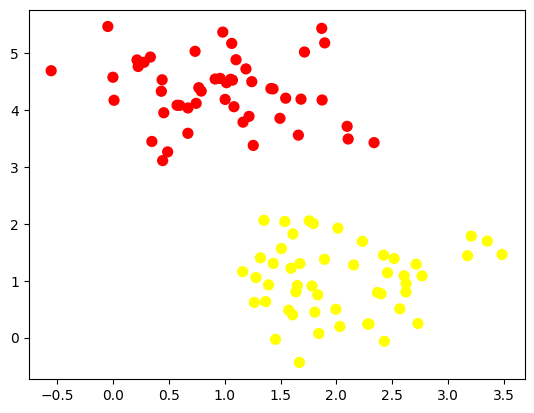

In [11]:
# Creating synthetic data

from sklearn.datasets import make_blobs

X, y = make_blobs(n_samples = 100, centers = 2, random_state = 0, cluster_std = 0.60)
plt.scatter(X[:, 0], X[:, 1], c = y, s = 50, cmap = 'autumn')

In [12]:
# splitting the data

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y)

In [13]:
# build a SVM-C model to classify this data:

from sklearn.svm import SVC # 'support vector classifier'

model = SVC(kernel = 'linear')
model.fit(X_train, y_train)

SVC(kernel='linear')

In [27]:
# Plotting:

def plot_svc_decision_fuction(model, ax = None, plot_support= True):
  ''' Plot the decision function  for a 2D SVC '''
  if ax is None:
    ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()

  # create grid to evaluate model
  x = np.linspace(xlim[0], xlim[1], 30)
  y = np.linspace(ylim[0], ylim[1], 30)

  Y, X = np.meshgrid(y,x)
  xy = np.vstack([X.ravel(), Y.ravel()]).T

  P = model.decision_function(xy).reshape(X.shape)

  # Plot decision boundaries and margins

  ax.contour(X, Y, P, colors = 'k', levels = [-1, 0, 1], alpha = 0.5, linestyles=['--', '-','--'])

  #plot support vector
  if plot_support:
    ax.scatter(model.support_vectors_[:, 0],
              model.support_vectors_[:, 1],
              s=300, linewidth = 1, facecolors = 'none');
    
  ax.set_xlim(xlim)
  ax.set_ylim(ylim)

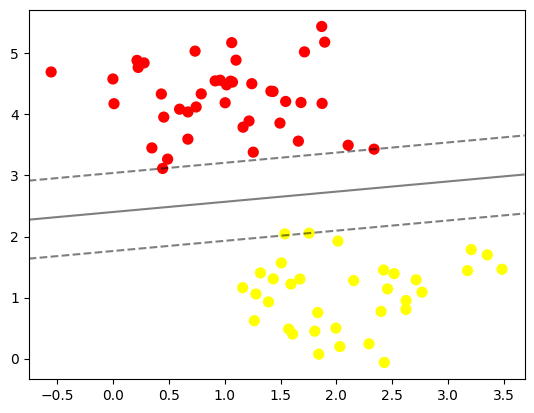

In [28]:
plt.scatter(X_train[:, 0], X_train[:, 1], c = y_train, s = 50, cmap = 'autumn')
plot_svc_decision_fuction(model);

In [29]:
y_predict = model.predict(X_test)

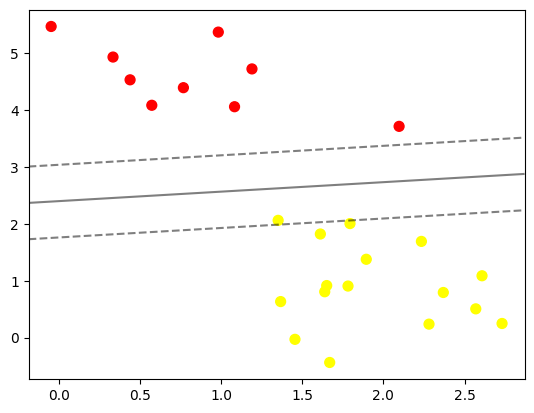

In [30]:
plt.scatter(X_test[:, 0],X_test[:, 1], c=y_test, s=50, cmap='autumn')
plot_svc_decision_fuction(model)

In [31]:
from sklearn.metrics import confusion_matrix, classification_report

print(confusion_matrix(y_test, y_predict))
print(classification_report(y_test, y_predict))

[[ 9  0]
 [ 0 16]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         9
           1       1.00      1.00      1.00        16

    accuracy                           1.00        25
   macro avg       1.00      1.00      1.00        25
weighted avg       1.00      1.00      1.00        25

